# Building Time Series Visualization
## Progressive Demo A

In [1]:
import rdflib

import dbmanager
import vismanager

### Load the timeseries data into the DB

In [2]:
data_zip_file = '../datasets/bts_site_b_train/train.zip'
mapping_csv_file = '../datasets/bts_site_b_train/mapper_TrainOnly.csv'
db = dbmanager.DBManager(data_zip_file, mapping_csv_file)

### Setup our analysis and visualisation manager

In [3]:
vm = vismanager.VisManager(db)

### Get insights into the building model

In [4]:
# Dan, so stuff

### Get insights into the building climate

Rooms with temperature information:

In [5]:
rooms_with_temp = vm.get_rooms_with_temp()
for row in rooms_with_temp:
    print(row)

(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Conference_Room'), rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#3b373634_2461_4b61_8bcb_068c12b7e1a8.6af9698e_b72b_48d7_b864_9a0d518ec3b1'))
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Conference_Room'), rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#3b373634_2461_4b61_8bcb_068c12b7e1a8.cbd54644_e644_4743_a015_7b53af377a11'))
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Conference_Room'), rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#3b373634_2461_4b61_8bcb_068c12b7e1a8.df84f19d_e8f9_4bdf_963b_71b2cd80cf9e'))
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Conference_Room'), rd

Select a room and plot the temperature:

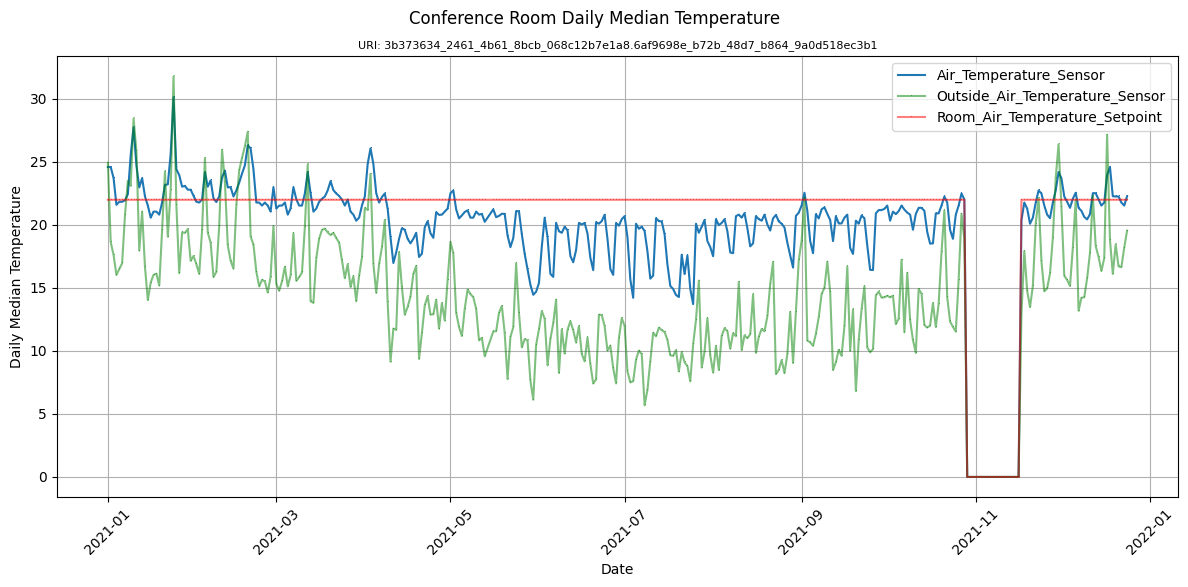

In [6]:
vm.plot_daily_room_temp(rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#3b373634_2461_4b61_8bcb_068c12b7e1a8.6af9698e_b72b_48d7_b864_9a0d518ec3b1'))

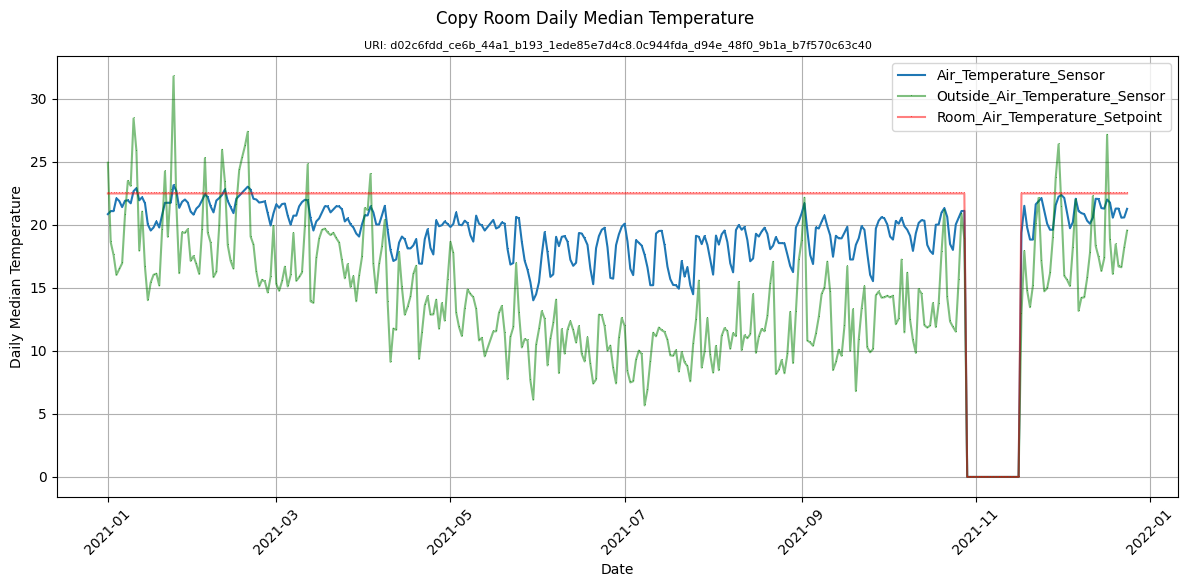

In [7]:
vm.plot_daily_room_temp(rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#d02c6fdd_ce6b_44a1_b193_1ede85e7d4c8.0c944fda_d94e_48f0_9b1a_b7f570c63c40'))

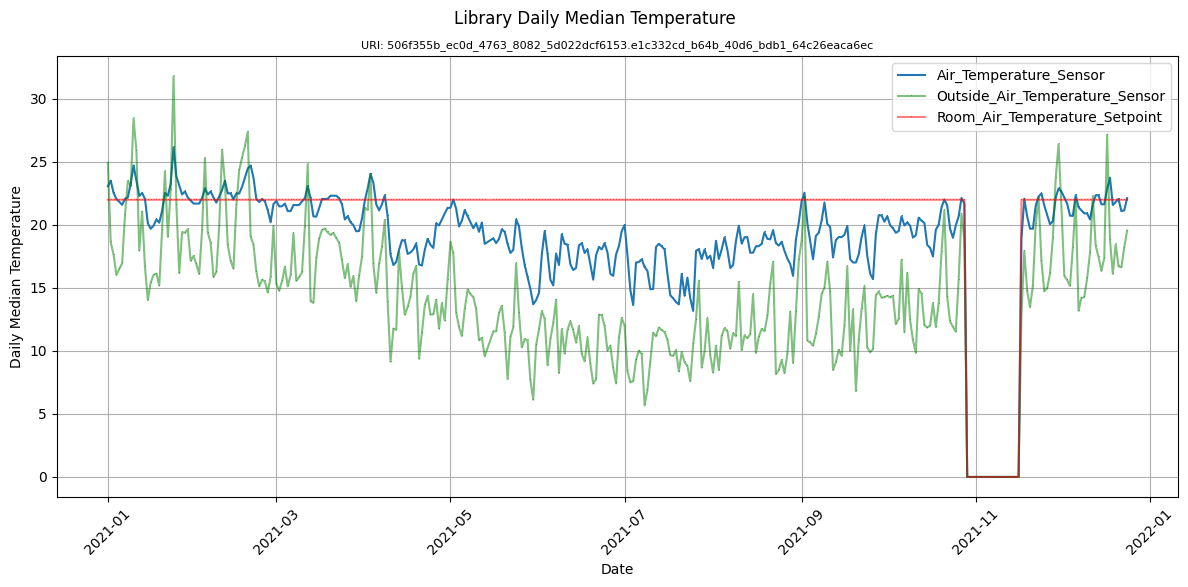

In [8]:
vm.plot_daily_room_temp(rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#506f355b_ec0d_4763_8082_5d022dcf6153.e1c332cd_b64b_40d6_bdb1_64c26eaca6ec'))

### Get insights into the building consumption

In [9]:
# Fetch electrical meters (energy, power, solar generation) and their associated sensors from the database
df_energy_meters = vm.get_electrical_meters('Electrical_Meter', 'Electrical_Energy_Sensor')
df_power_meters = vm.get_electrical_meters('Electrical_Meter', 'Electrical_Power_Sensor')
df_electrical_genration_meters = vm.get_electrical_meters('Electrical_Generation_Meter', 'Electrical_Power_Sensor')

# Filter the data for real power complexity (KWH, KW) real power consumption only (ignore reactive, apparent for this demo)
df_energy_meters = df_energy_meters[df_energy_meters['Power Complexity'] == 'real']
df_power_meters = df_power_meters[df_power_meters['Power Complexity'] == 'real']
df_electrical_genration_meters = df_electrical_genration_meters[df_electrical_genration_meters['Power Complexity'] == 'real']

# Load the sensor data from the database
df_energy_meters_data = vm.load_sensors_from_db(df_energy_meters)
df_power_meters_data = vm.load_sensors_from_db(df_power_meters)
df_electrical_genration_meters_data = vm.load_sensors_from_db(df_electrical_genration_meters)


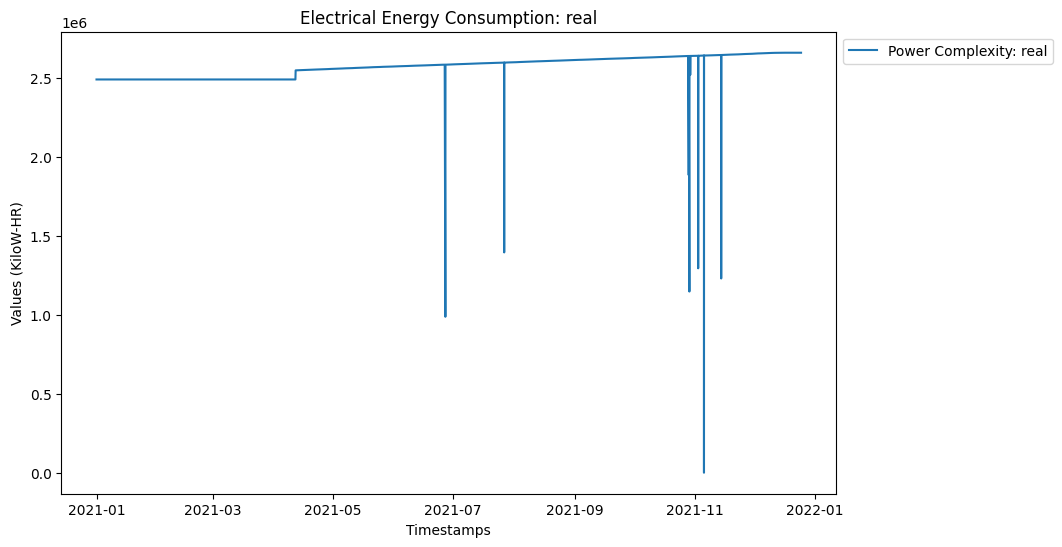

In [10]:
# Plot the electrical energy meters data
vm.plot_sensor_data_grouped_by_power_complexity(df_energy_meters_data, 'Electrical Energy Consumption')

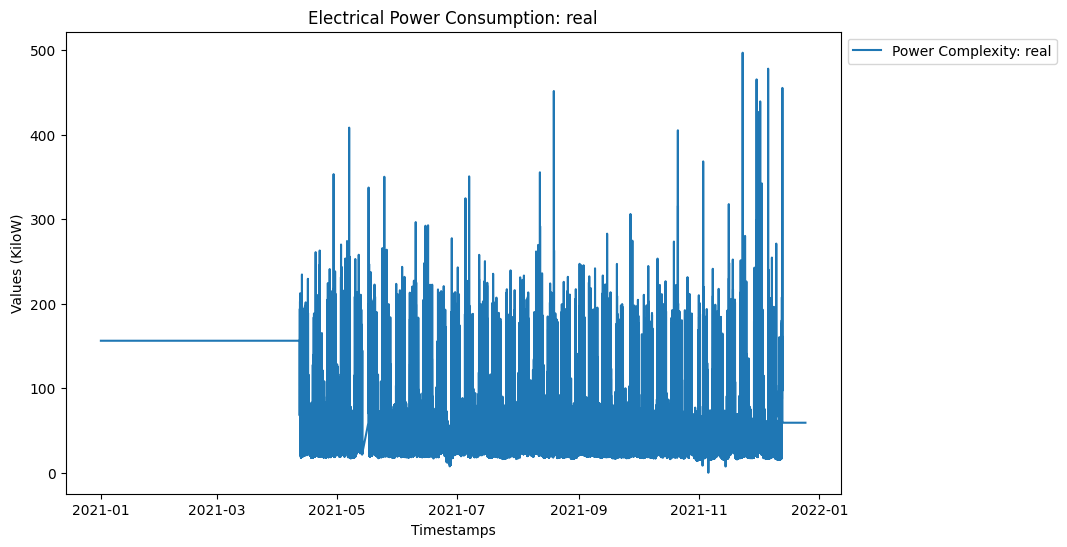

In [11]:
vm.plot_sensor_data_grouped_by_power_complexity(df_power_meters_data, 'Electrical Power Consumption')


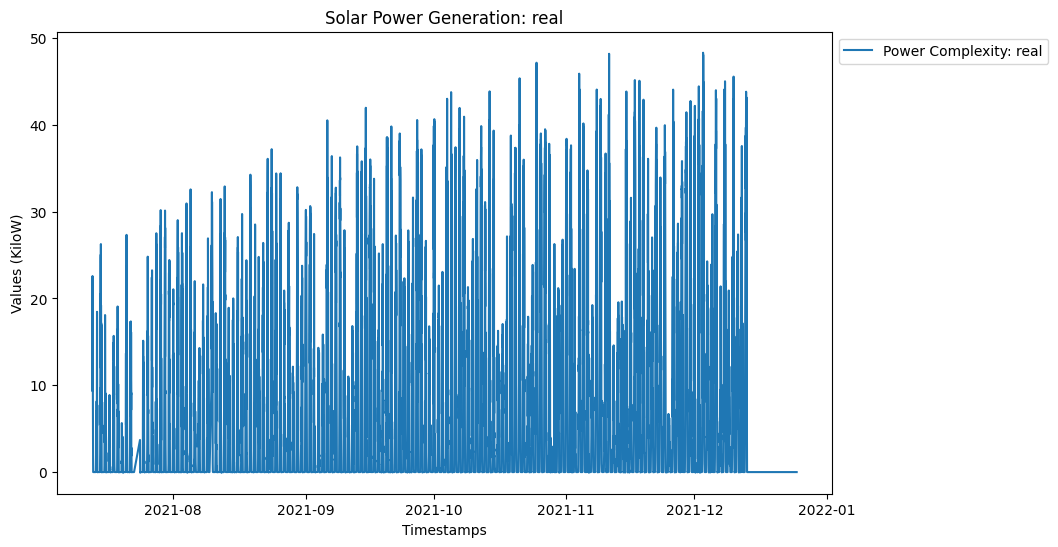

In [12]:
vm.plot_sensor_data_grouped_by_power_complexity(df_electrical_genration_meters_data , 'Solar Power Generation')

In [15]:
# Fetch utilities meters (Gas, Water) and their associated sensors from the database
df_gas_meters = vm.get_utilities_meters('Building_Gas_Meter', 'Usage_Sensor')
df_water_meters = vm.get_utilities_meters('Building_Water_Meter', 'Usage_Sensor')

# Load the sensor data from the database
df_gas_meters_data = vm.load_utilities_sensors_from_db(df_gas_meters)
df_water_meters_data = vm.load_utilities_sensors_from_db(df_water_meters)

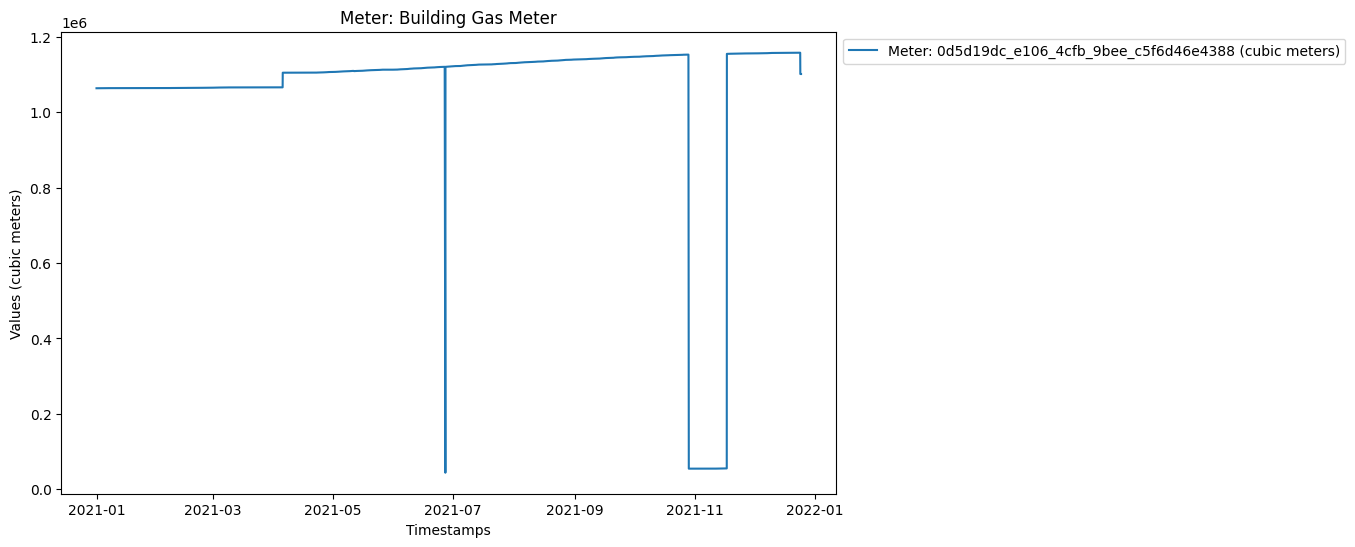

In [17]:
vm.plot_sensor_data_grouped_by_meter(df_gas_meters_data, 'Building Gas Meter')


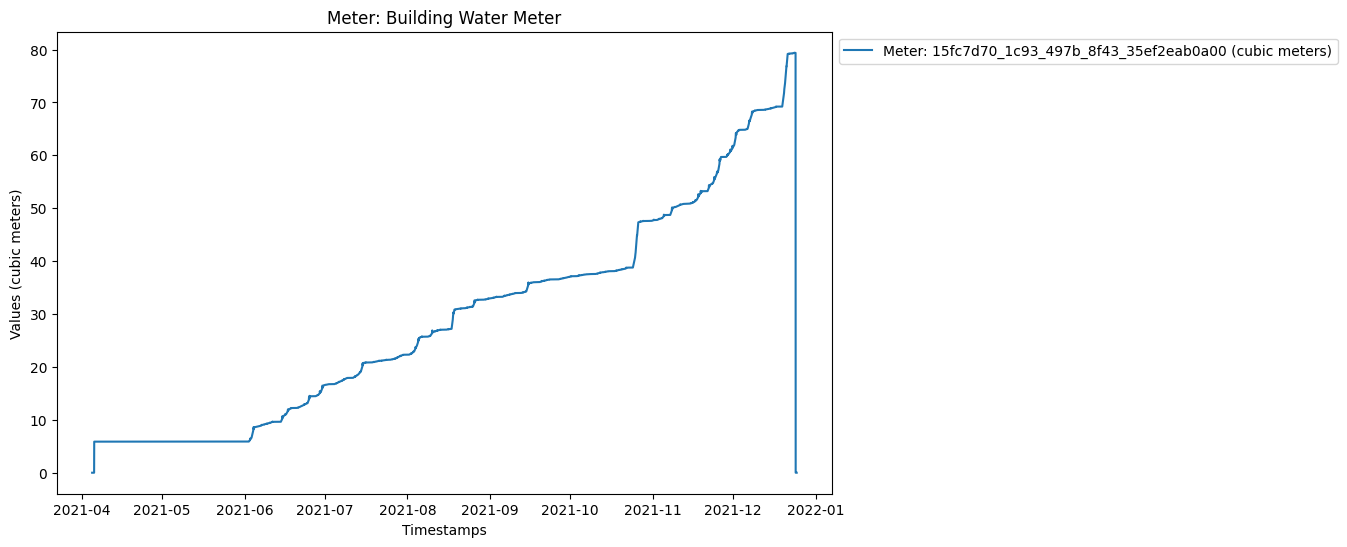

In [18]:
vm.plot_sensor_data_grouped_by_meter(df_water_meters_data, 'Building Water Meter')
